In [1]:
%run kinetic_axion.py
%run observables.py

In [6]:
def min_theta_dot(theta_i): 
    return np.sqrt(2*(1 - np.cos(theta_i)))
def calc_kinetic_stop(H_inf, m_a, theta_dot_i): 
    return 1 / (3 * (H_inf / m_a)) * (2 / theta_dot_i)**(-2/3) # axion units 

In [18]:
H_inf = 2.51e12
Gamma_inf = 1e8
m_a = 1e11
theta_i = 1
theta_dot_i = 1e2 * min_theta_dot(theta_i)

tmax_axion_time = calc_kinetic_stop(H_inf, m_a, theta_dot_i) + 2*np.pi*10

energy_scale, conv_factor, rho_R_init, rho_inf_init, scale, tmax_inf_time, red_chem_pots_init = \
    init_system(H_inf, Gamma_inf, (m_a,), kinetic_axion_field, tmax_axion_time)

sol_rh, T_and_H_fn, T_and_H_and_T_dot_fn, sol_axion, axion_source, sol_transp_eq, tmax_axion_time = \
    solve_system(H_inf, rho_R_init, rho_inf_init, (theta_i, theta_dot_i), red_chem_pots_init,
                 tmax_axion_time, conv_factor, Gamma_inf, scale, 
                 (m_a,), kinetic_axion_field, transport_equation.source_vector_weak_sphaleron,
                 False, False)

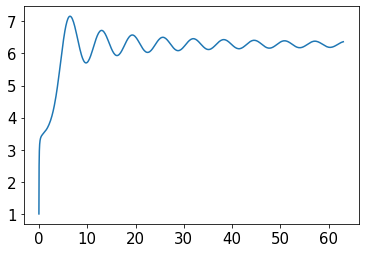

In [19]:
t = sol_axion.t
theta, theta_dot = sol_axion.sol(t)
plt.plot(t, theta)

<function transport_equation.solve.<locals>.<lambda>(log_t)>